## **Import File**

In [ ]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Astra Graphia Task/data_complaint.csv", sep=None, engine="python")

## **Data Cleaning**

In [ ]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,211255,Disney harassment,04/01/2015,04-Jan-15,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No
1,211472,Disney cable,04/01/2015,04-Jan-15,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No
2,211478,Disney,04/01/2015,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No
3,211677,Disney refusal of service,04/01/2015,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No
4,211775,Horrible Service,04/01/2015,04-Jan-15,12:28:58 PM,Customer Care Call,Mckeesport,Pennsylvania,15132,Closed,No


In [ ]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [ ]:
df.rename(columns={
    "Ticket #": "Ticket_Number",
    "Customer Complaint": "Customer_Complaint",
    "Date_month_year": "Date_Month_Year",
    "Received Via": "Received_Via",
    "Zip code": "Zip_Code",
    "Filing on Behalf of Someone": "Filing_on_Behalf_of_Someone"
}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket_Number                2224 non-null   object
 1   Customer_Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_Month_Year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received_Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip_Code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing_on_Behalf_of_Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.3+ KB


In [ ]:
num_rows = len(df['Ticket_Number'].unique())
print(f"Jumlah baris tiket: {num_rows}")

Jumlah baris tiket: 2224


In [ ]:
df.shape,len(df)

((2224, 11), 2224)

In [ ]:
df = df.sort_values(by=['Ticket_Number'])

In [ ]:
df.drop(columns=["Date"], inplace=True)

In [ ]:
df.isna().sum()

,0
Ticket_Number,0
Customer_Complaint,0
Date_Month_Year,0
Time,0
Received_Via,0
City,0
State,0
Zip_Code,0
Status,0
Filing_on_Behalf_of_Someone,0


In [ ]:
df['Ticket_Number'].duplicated().sum()

np.int64(0)

In [ ]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [ ]:
df['Filing_on_Behalf_of_Someone'].unique()

array(['No', 'No;;', 'Yes', 'No;', 'Yes;;'], dtype=object)

In [ ]:
df['Filing_on_Behalf_of_Someone'] = df['Filing_on_Behalf_of_Someone'].str.replace(r';+', '', regex=True)
df['Filing_on_Behalf_of_Someone'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.head(10)

,Ticket_Number,Customer_Complaint,Date_Month_Year,Time,Received_Via,City,State,Zip_Code,Status,Filing_on_Behalf_of_Someone
0,211255,Disney harassment,04-Jan-15,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No
1,211472,Disney cable,04-Jan-15,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No
2,211478,Disney,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No
3,211677,Disney refusal of service,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No
4,211775,Horrible Service,04-Jan-15,12:28:58 PM,Customer Care Call,Mckeesport,Pennsylvania,15132,Closed,No
5,211784,billing,04-Jan-15,12:32:23 PM,Customer Care Call,Stone Mountain,Georgia,30083,Closed,No
6,211904,Unable to get in touch with anyone that has th...,04-Jan-15,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No
7,211976,Fraudulent claims reported to collections agency,04-Jan-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No
8,212079,No Internet service,04-Jan-15,1:53:22 PM,Internet,Philadelphia,Pennsylvania,19128,Closed,No
9,212228,Disney Lied About Pricing And Installation,04-Jan-15,2:29:41 PM,Customer Care Call,Newark,California,94560,Closed,No


## **Analysis**

In [ ]:
df_city_counts = df['City'].value_counts().reset_index()
df_city_counts.columns = ['City', 'Count']
print(df_city_counts)

              City  Count
0          Atlanta     63
1          Chicago     47
2        Knoxville     36
3          Houston     33
4     Jacksonville     31
..             ...    ...
923         Skokie      1
924       Waukegan      1
925  Boynton Beach      1
926         Newman      1
927          Wayne      1

[928 rows x 2 columns]


In [ ]:
city_counts = df['City'].value_counts().nlargest(10)
city_counts

,count
City,
Atlanta,63
Chicago,47
Knoxville,36
Houston,33
Jacksonville,31
Philadelphia,25
Nashville,22
Denver,22
Miami,22


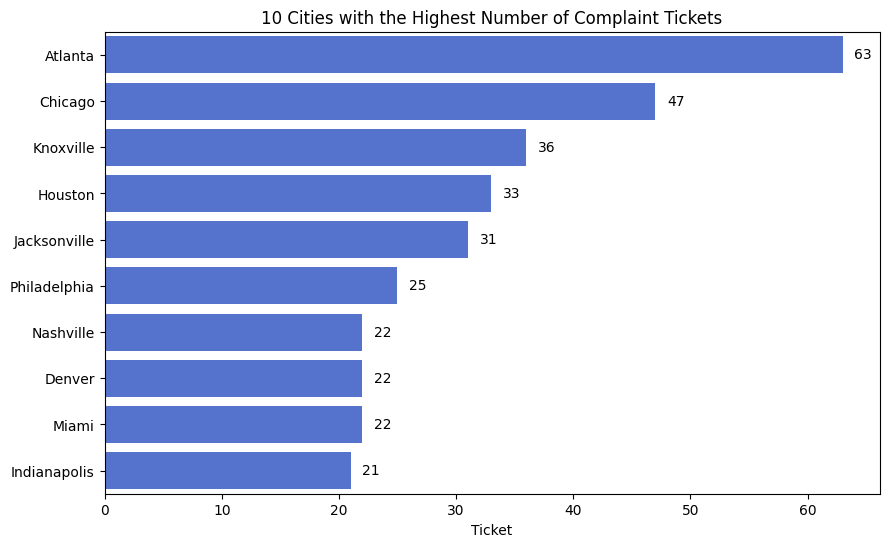

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, color="royalblue")
for i, txt in enumerate(city_counts.values):
    plt.text(txt + 1, i, str(txt), ha='left', va='center', fontsize=10, color='black')
plt.xlabel("Ticket")
plt.ylabel("")
plt.title("10 Cities with the Highest Number of Complaint Tickets")
plt.show()

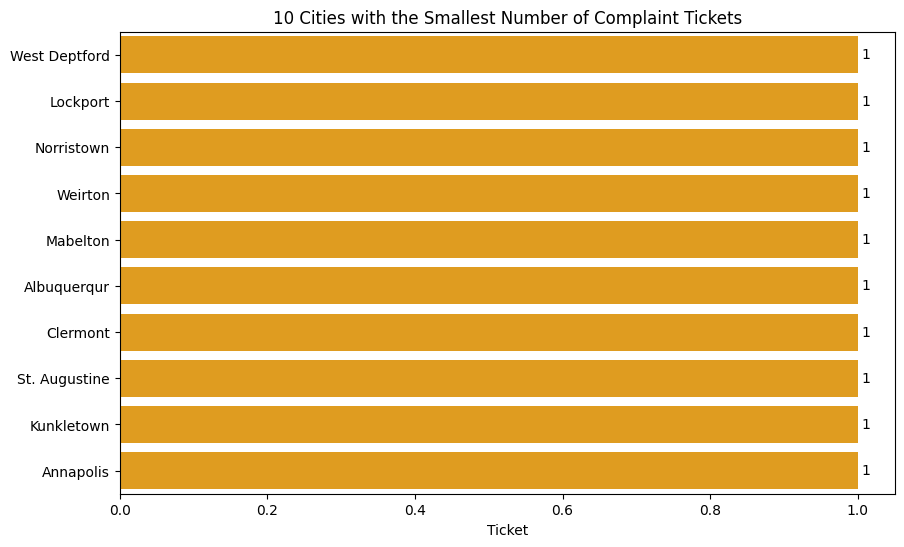

In [ ]:
smallest_comp = df['City'].value_counts().nsmallest(10)
smallest_comp
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=smallest_comp.values, y=smallest_comp.index, color="orange")
for i, txt in enumerate(smallest_comp.values):
    plt.text(txt + 0.005, i, str(txt), ha='left', va='center', fontsize=10, color='black')
plt.xlabel("Ticket")
plt.ylabel("")
plt.title("10 Cities with the Smallest Number of Complaint Tickets")
plt.show()

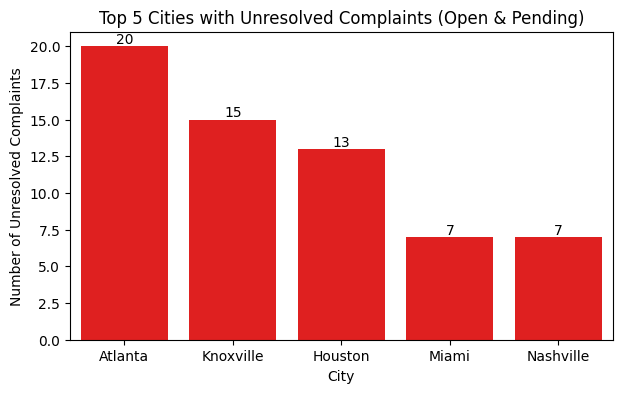

In [ ]:
unresolved_df = df[df['Status'].isin(["Open", "Pending"])]

# Jumlah complaint yang belum selesai per kota
unresolved_per_city = unresolved_df['City'].value_counts().nlargest(5)
plt.figure(figsize=(7, 4))
sns.barplot(x=unresolved_per_city.index, y=unresolved_per_city.values, color='red')
for i, txt in enumerate(unresolved_per_city.values):
    plt.text(i, txt + 0.2, str(txt), ha='center', fontsize=10, color='black')
plt.ylabel("Number of Unresolved Complaints")
plt.xlabel("City")
plt.title("Top 5 Cities with Unresolved Complaints (Open & Pending)")
plt.xticks(rotation=0)  # Putar label kota agar lebih mudah dibaca
plt.show()


In [ ]:
unresolved_per_city

,count
City,
Atlanta,20
Knoxville,15
Houston,13
Miami,7
Nashville,7


In [ ]:
status_counts = df['Status'].value_counts()
status_counts

,count
Status,
Solved,973
Closed,734
Open,363
Pending,154


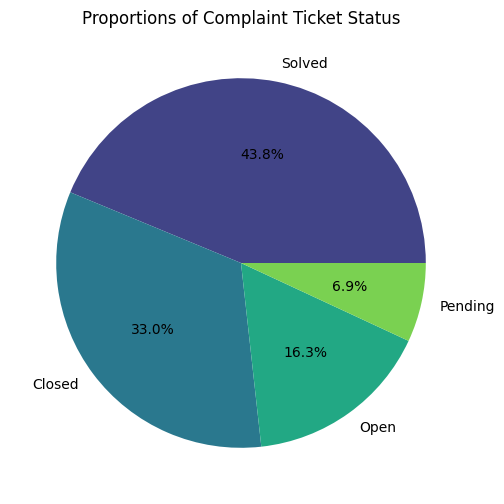

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(status_counts)))
plt.title("Proportions of Complaint Ticket Status")
plt.show()

In [ ]:
total_complaint = status_counts.sum()
belum_selesai = status_counts["Open"] + status_counts["Pending"]
persentase_belum_selesai = (belum_selesai / total_complaint) * 100
print(f"Complaint Belum Selesai (Open + Pending): {belum_selesai}")
print(f"Persentase Complaint yang Belum Selesai: {persentase_belum_selesai:.2f}%")

Complaint Belum Selesai (Open + Pending): 517
Persentase Complaint yang Belum Selesai: 23.25%


In [ ]:
Received_Via = df['Received_Via'].value_counts()
Received_Via

,count
Received_Via,
Customer Care Call,1119
Internet,1105


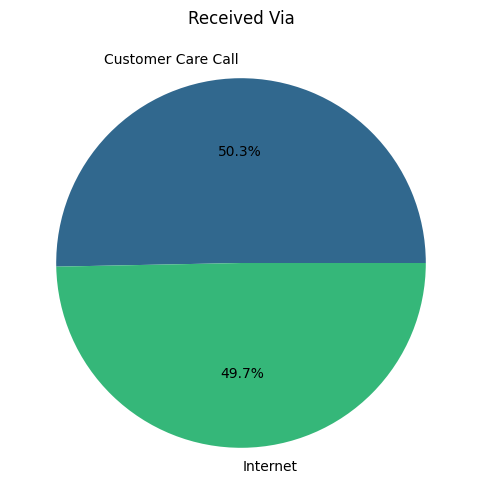

In [ ]:
#Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(Received_Via.values, labels=Received_Via.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(Received_Via)))
plt.title("Received Via")
plt.show()

In [ ]:
Filing_on_Behalf_of_Someone = df['Filing_on_Behalf_of_Someone'].value_counts()
Filing_on_Behalf_of_Someone

,count
Filing_on_Behalf_of_Someone,
No,2021
Yes,203


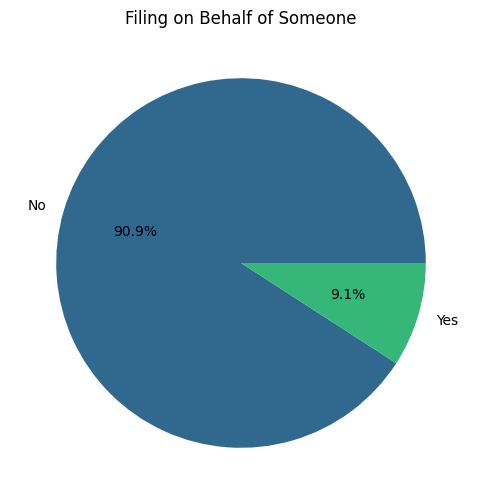

In [ ]:
#Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(Filing_on_Behalf_of_Someone.values, labels=Filing_on_Behalf_of_Someone.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(Filing_on_Behalf_of_Someone)))
plt.title("Filing on Behalf of Someone")
plt.show()

In [ ]:
df[['Date_Month_Year','Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_Month_Year  2224 non-null   object
 1   Time             2224 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df["Date_Month_Year"] = pd.to_datetime(df["Date_Month_Year"], format="%d-%b-%y")
df[['Date_Month_Year','Time']].head()

,Date_Month_Year,Time
0,2015-01-04,12:18:47 AM
1,2015-01-04,10:43:20 AM
2,2015-01-04,10:47:35 AM
3,2015-01-04,12:01:06 PM
4,2015-01-04,12:28:58 PM


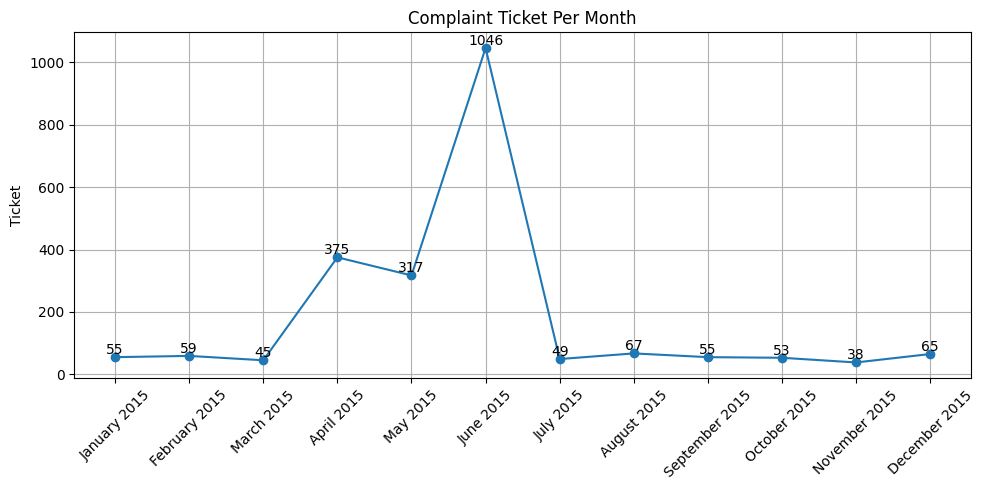

In [ ]:
monthly_complaints['Month_dt'] = pd.to_datetime(monthly_complaints['Month'], format='%B %Y')
monthly_complaints = monthly_complaints.sort_values('Month_dt')
plt.figure(figsize=(10, 5))
plt.plot(monthly_complaints['Month'], monthly_complaints['Complaint_Count'], marker='o', linestyle='-')
for i, txt in enumerate(monthly_complaints['Complaint_Count']):
    plt.text(monthly_complaints['Month'].iloc[i], txt, str(txt), ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Ticket")
plt.title("Complaint Ticket Per Month")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
monthly_complaints

,Month,Complaint_Count,Month_dt
4,January 2015,55,2015-01-01
3,February 2015,59,2015-02-01
7,March 2015,45,2015-03-01
0,April 2015,375,2015-04-01
8,May 2015,317,2015-05-01
6,June 2015,1046,2015-06-01
5,July 2015,49,2015-07-01
1,August 2015,67,2015-08-01
11,September 2015,55,2015-09-01
10,October 2015,53,2015-10-01


In [ ]:
# Konversi datetime
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

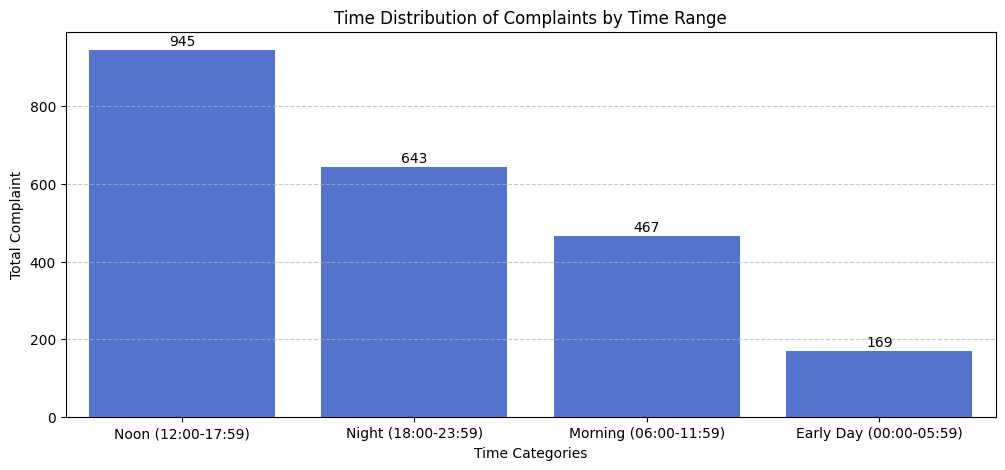

In [ ]:
# Buat kategori waktu
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning (06:00-11:59)"
    elif 12 <= hour < 18:
        return "Noon (12:00-17:59)"
    elif 18 <= hour < 24:
        return "Night (18:00-23:59)"
    else:
        return "Early Day (00:00-05:59)"
df['Time Category'] = df['Time'].apply(categorize_time)

# Jumlah keluhan per kategori waktu
time_category_counts = df['Time Category'].value_counts()

# Bar Chart
plt.figure(figsize=(12, 5))
sns.barplot(x=time_category_counts.index, y=time_category_counts.values, color='royalblue')
for i, txt in enumerate(time_category_counts.values):
    plt.text(time_category_counts.index[i], txt + 4, str(txt), ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel("Time Categories")
plt.ylabel("Total Complaint")
plt.title("Time Distribution of Complaints by Time Range")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
time_category_counts

,count
Time Category,
Noon (12:00-17:59),945
Night (18:00-23:59),643
Morning (06:00-11:59),467
Early Day (00:00-05:59),169


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket_Number                2224 non-null   object        
 1   Customer_Complaint           2224 non-null   object        
 2   Date_Month_Year              2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   int32         
 4   Received_Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip_Code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing_on_Behalf_of_Someone  2224 non-null   object        
 10  Time Category                2224 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), o

# **Sentiment Analysist**

In [ ]:
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Gabungkan semua teks dalam kolom Customer Complaint
all_complaints = " ".join(df['Customer_Complaint'].astype(str)).lower()

# Tokenisasi
words = all_complaints.split()
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)

most_common_words = word_counts.most_common(10)
most_common_words

[('disney', 1160),
 ('internet', 508),
 ('service', 411),
 ('billing', 273),
 ('data', 217),
 ('speed', 112),
 ('cap', 103),
 ('customer', 87),
 ('issues', 85),
 ('caps', 76)]

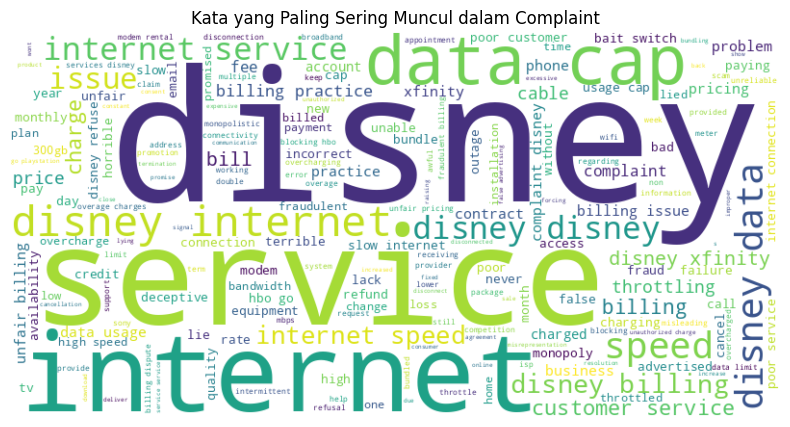

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Kata yang Paling Sering Muncul dalam Complaint")
plt.show()


In [ ]:
categories = {
    "Internet Speed Issues": ["slow", "speed", "mbps", "connection", "buffering","internet"],
    "Billing Issues": ["bill", "charge", "refund", "overcharge", "payment"],
    "Customer Service Issues": ["rude", "support", "help", "call", "waiting"],
    "Technical Issues": ["outage", "not working", "broken", "down", "service"]
}

# Klasifikasi keluhan
def classify_complaint(complaint):
    complaint = complaint.lower()
    for category, keywords in categories.items():
        if any(keyword in complaint for keyword in keywords):
            return category
    return "Other"
df['Category'] = df['Customer_Complaint'].astype(str).apply(classify_complaint)
df['Category'].value_counts()

,count
Category,
Other,848
Internet Speed Issues,647
Billing Issues,448
Technical Issues,254
Customer Service Issues,27


<ipython-input-49-279f15d3a110>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="Blues_r")


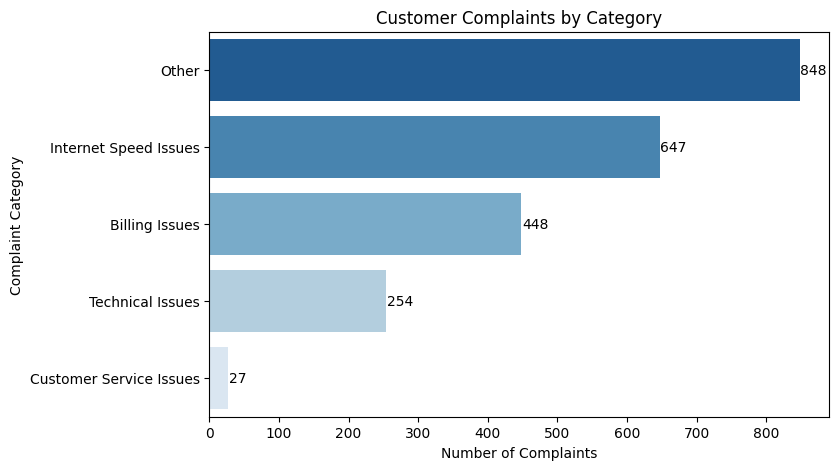

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="Blues_r")
for index, value in enumerate(df['Category'].value_counts()):
    plt.text(value + 1, index, str(value), ha='left', va='center', fontsize=10, color='black')
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Category")
plt.title("Customer Complaints by Category")
plt.show()

In [ ]:
# Complaint per month by category
df_filtered = df[df["Category"] != "Other"]
top_complaints_per_month = df_filtered.groupby(df_filtered["Date_Month_Year"].dt.strftime("%B %Y"))['Category'] \
    .agg(lambda x: x.value_counts().idxmax()) \
    .reset_index()
top_complaints_per_month.columns = ['Month', 'Most Common Complaint']
top_complaints_per_month

,Month,Most Common Complaint
0,April 2015,Internet Speed Issues
1,August 2015,Internet Speed Issues
2,December 2015,Internet Speed Issues
3,February 2015,Billing Issues
4,January 2015,Internet Speed Issues
5,July 2015,Billing Issues
6,June 2015,Internet Speed Issues
7,March 2015,Billing Issues
8,May 2015,Internet Speed Issues
9,November 2015,Internet Speed Issues
